# Grafiques Javi

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Pers_lib as Pers

In [2]:
df_tickets = pd.read_csv('tiksDS.csv')
df_tickets = df_tickets.drop(columns="Unnamed: 0")
df_tickets.head()

,date,subtotal,tax,total,currency_code,payment.type,bill_to.name,vendor.type,vendor.name,vendor.address
0,2021-09-17 00:00:00,1.16,52.25,1.16,EUR,visa,Alice McCarthy,Catering,HARIBO,Carretera de la Vila 90 C.C. The style Outlets...
1,2021-09-18 00:00:00,1.16,52.25,1.16,EUR,master_card,Brosina Hoffman,sportswear,GEOGRAPHICAL NORWAY,Carretera de la Vila 90 C.C. The style Outlets...
2,2021-10-02 00:00:00,1.16,52.25,1.16,EUR,master_card,Brosina Hoffman,sportswear,GEOGRAPHICAL NORWAY,Carretera de la Vila 90 C.C. The style Outlets...
3,2021-09-23 00:00:00,1.16,52.25,1.16,EUR,cash,Cyma Kinney,footwear,CONVERSE,Carretera de la Vila 90 C.C. The style Outlets...
4,2021-09-08 00:00:00,1.16,52.25,1.16,EUR,visa,Darrin Martin,mixed clothing,MARINA MILITARE,Carretera de la Vila 90 C.C. The style Outlets...


In [3]:
#Type Adaptation
df_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704 entries, 0 to 3703
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3704 non-null   object 
 1   subtotal        3704 non-null   float64
 2   tax             3704 non-null   float64
 3   total           3704 non-null   float64
 4   currency_code   3704 non-null   object 
 5   payment.type    3704 non-null   object 
 6   bill_to.name    3704 non-null   object 
 7   vendor.type     3704 non-null   object 
 8   vendor.name     3704 non-null   object 
 9   vendor.address  3704 non-null   object 
dtypes: float64(3), object(7)
memory usage: 289.5+ KB


In [4]:
## Split
df_tickets[['Day','Hour']] = df_tickets.date.str.split(' ', 1, expand=True)
df_tickets = df_tickets.drop(columns=['date','Hour'])

In [5]:
df_tickets['Day'] = pd.to_datetime(df_tickets['Day'])
df_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704 entries, 0 to 3703
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   subtotal        3704 non-null   float64       
 1   tax             3704 non-null   float64       
 2   total           3704 non-null   float64       
 3   currency_code   3704 non-null   object        
 4   payment.type    3704 non-null   object        
 5   bill_to.name    3704 non-null   object        
 6   vendor.type     3704 non-null   object        
 7   vendor.name     3704 non-null   object        
 8   vendor.address  3704 non-null   object        
 9   Day             3704 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 289.5+ KB


In [6]:
cols = ['currency_code', 'payment.type', 'bill_to.name', 'vendor.type','vendor.name','vendor.address']
df_tickets[cols] = df_tickets[cols].astype('category')
df_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704 entries, 0 to 3703
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   subtotal        3704 non-null   float64       
 1   tax             3704 non-null   float64       
 2   total           3704 non-null   float64       
 3   currency_code   3704 non-null   category      
 4   payment.type    3704 non-null   category      
 5   bill_to.name    3704 non-null   category      
 6   vendor.type     3704 non-null   category      
 7   vendor.name     3704 non-null   category      
 8   vendor.address  3704 non-null   category      
 9   Day             3704 non-null   datetime64[ns]
dtypes: category(6), datetime64[ns](1), float64(3)
memory usage: 177.0 KB


In [7]:
Pers.df_info(df_tickets)

[-------------------------SHAPE------------------------]


(3704, 10)

[-------------------------INFO-------------------------]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704 entries, 0 to 3703
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   subtotal        3704 non-null   float64       
 1   tax             3704 non-null   float64       
 2   total           3704 non-null   float64       
 3   currency_code   3704 non-null   category      
 4   payment.type    3704 non-null   category      
 5   bill_to.name    3704 non-null   category      
 6   vendor.type     3704 non-null   category      
 7   vendor.name     3704 non-null   category      
 8   vendor.address  3704 non-null   category      
 9   Day             3704 non-null   datetime64[ns]
dtypes: category(6), datetime64[ns](1), float64(3)
memory usage: 177.0 KB


None

[-----------------------DESCRIBE-----------------------]


,subtotal,tax,total,currency_code,payment.type,bill_to.name,vendor.type,vendor.name,vendor.address,Day
count,3704.00,3704.00,3704.00,3704,3704,3704,3704,3704,3704,3704
unique,NaN,NaN,NaN,13,3,764,36,158,73,NaN
top,NaN,NaN,NaN,EUR,visa,Zuschuss Carroll,mixed clothing,GUESS,Carretera de la Vila 90 C.C. The style Outlets...,NaN
freq,NaN,NaN,NaN,3602,2811,23,687,50,3573,NaN
mean,638.38,81.81,687.71,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-27 21:09:19.827213824
min,1.16,0.26,1.16,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-23 00:00:00
25%,10.72,2.13,11.95,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-24 18:00:00
50%,19.34,5.36,20.60,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-22 00:00:00
75%,75.00,18.27,100.00,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-26 00:00:00
max,26710.00,2613.25,29313.25,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-30 00:00:00


[------------------------NaN's-------------------------]


subtotal          0
tax               0
total             0
currency_code     0
payment.type      0
bill_to.name      0
vendor.type       0
vendor.name       0
vendor.address    0
Day               0
dtype: int64

[--------------Values in categorical variables---------]
------------------currency_code-------------------
------------Unique Values--------------
Number of unique values is: 13
['EUR', 'USD', 'GBP', 'MYR', 'AUD', ..., 'AED', 'MXN', 'PLN', 'COP', 'HKD']
Length: 13
Categories (13, object): ['AED', 'AUD', 'CAD', 'COP', ..., 'MYR', 'PEN', 'PLN', 'USD']
------------Value Counts--------------


EUR    3602
USD      61
GBP      13
CAD       4
DKK       4
MXN       4
AUD       3
COP       3
HKD       3
PLN       3
PEN       2
AED       1
MYR       1
Name: currency_code, dtype: int64

------------------payment.type-------------------
------------Unique Values--------------
Number of unique values is: 3
['visa', 'master_card', 'cash']
Categories (3, object): ['cash', 'master_card', 'visa']
------------Value Counts--------------


visa           2811
master_card     756
cash            137
Name: payment.type, dtype: int64

------------------bill_to.name-------------------
------------Unique Values--------------
Number of unique values is: 764
['Alice McCarthy', 'Brosina Hoffman', 'Cyma Kinney', 'Darrin Martin', 'Erica Hackney', ..., 'Vicky Freymann', 'Vivek Gonzalez', 'Vivek Grady', 'William Brown', 'Yana Sorensen']
Length: 764
Categories (764, object): ['31 Stephane', 'A BARCELONETA', 'APT. SALESPERSON', 'ATENDU PUR: Karon', ..., 'Zuschuss Carroll', 'Zuschuss Donatelli', 'conventent and GREEN', 'stewart capps']
------------Value Counts--------------


Zuschuss Carroll    23
Brian Moss          23
Tracy Blumstein     21
Stefania Perrino    19
Tamara Dahlen       18
                    ..
Ralph Ritter         1
Eric Murdock         1
Ricardo Sperren      1
Richard Eichhorn     1
31 Stephane          1
Name: bill_to.name, Length: 764, dtype: int64

------------------vendor.type-------------------
------------Unique Values--------------
Number of unique values is: 36
['Catering', 'sportswear', 'footwear', 'mixed clothing', 'women's underwear', ..., 'Auto Parts', 'Utilities', 'Electronics Store', 'store', 'department_store,clothing_store,store']
Length: 36
Categories (36, object): ['Auto Parts', 'Catering', 'Coffee', 'Department Store', ..., 'supermarket,grocery_or_supermarket,food,store', 'women's clothing', 'women's clothing,men's clothing', 'women's underwear']
------------Value Counts--------------


mixed clothing                                   687
footwear                                         545
sportswear                                       410
Restaurant                                       384
men's clothing                                   322
women's clothing                                 313
accessories                                      281
home_goods                                       138
women's underwear                                137
cosmetic                                         136
Catering                                         135
jewelry                                           51
mixed clothing, sportswear, outdoor               45
kid's clothing                                    45
Grocery                                           12
supermarket,grocery_or_supermarket,food,store      8
Fuel                                               8
department store                                   6
drugstore                                     

------------------vendor.name-------------------
------------Unique Values--------------
Number of unique values is: 158
['HARIBO', 'GEOGRAPHICAL NORWAY', 'CONVERSE', 'MARINA MILITARE', 'VANITY FAIR', ..., 'Supreme', 'Nordstrom Chinook Centre', 'Sherman Sherman Johnnie & Hoyt, LLP', 'Galeries Lafayette Haussmann', 'Tiffany & Co.']
Length: 158
Categories (158, object): ['ADIDAS/REEBOK', 'ADOLFO DOMÍNGUEZ', 'ALVARO MORENO', 'Adidas', ..., 'Walgreens', 'Walmart', 'Yves Saint Laurent', 'Zara']
------------Value Counts--------------


GUESS                      50
LA MALLORQUINA             48
SANTA GLORIA               48
JAVIER SIMORRA             48
UDON                       48
                           ..
Kiseki                      1
Dayton Bisruit Co.          1
Benugo @ British Museum     1
Carrefour Express           1
Fish & Chips                1
Name: vendor.name, Length: 158, dtype: int64

------------------vendor.address-------------------
------------Unique Values--------------
Number of unique values is: 73
['Carretera de la Vila 90 C.C. The style Outlet..., '12940 Saratoga Sunnyvale Rd, Saratoga, CA, 95..., '17447 Haggerty Rd, Northville, MI, 48168, US', 'Kurfürstendamm 20-24', 'San Pedro Kalea 33, 20110 Pasaia, Gipuzkoa, S..., ..., '6455 MacLeod Trai? S#\nUnit #', 'C/ STA.TERESA, 40 SANT CUGAT\nNIF', '693 Chemeketa St NE, Salem, OR 97301, United ..., '40 Bd Haussmann, 75009 Paris, France', '4101']
Length: 73
Categories (73, object): ['08011, Barcelona, Barcelona, Spain', '100 BULLA RD\nSTRATHMORE VIC 3041', '1071 BR, Amsterdam, North Holland, Netherlands', '11 Rue D'Amsterdam, Gare Sncf Saint Lazare, 7..., ..., 'San Pedro Kalea 33, 20110 Pasaia, Gipuzkoa, S..., 'Shopping City Süd Top 23 / Galerie 149, 2334 ..., 'Unit 109/110, Village, 50 Pingle Dr, Bicester..., 'Vlamingstraat 2, Bruges, West Flanders, 8000,...]
------------Value Counts--------------


Carretera de la Vila 90 C.C. The style Outlets, local 62, 63, 08840 Viladecans, Barcelona, Spain    3573
08011, Barcelona, Barcelona, Spain                                                                     5
1071 BR, Amsterdam, North Holland, Netherlands                                                         4
Carrer Can Bronca, 2, 07007 Palma, Illes Balears, Espanya                                              4
40 Bd Haussmann, 75009 Paris, France                                                                   4
                                                                                                    ... 
Av. de la Arboleda, 32, 41940 Tomares, Sevilla, Spain                                                  1
Avda dos Hermanas, Urb Benamara,, Crta. Cádiz - Málaga Km 167, 29680 Estepona, Málaga, Spain           1
Bailén, 4, 46007 Valencia Comunidad Valenciana, España                                                 1
C. de Alfonso XII, 28, 28014 Madrid, España            

In [8]:
CountVtype = df_tickets['vendor.type'].value_counts()
CountVtype.values >100
CountVtype = CountVtype[CountVtype.values >100]
CountVtype

mixed clothing       687
footwear             545
sportswear           410
Restaurant           384
men's clothing       322
women's clothing     313
accessories          281
home_goods           138
women's underwear    137
cosmetic             136
Catering             135
Name: vendor.type, dtype: int64

In [10]:
CountVnameBM = df_ticketsBM['vendor.name'].value_counts()
CountVnameBM.values >100
CountVnameBM = CountVnameBM[CountVnameBM.values >0]
CountVnameBM


ROCKPORT           7
ECCO               4
MUNICH             3
CAMPER             2
CALZEDONIA         2
BURGER KING        1
CARTE D'OR         1
MARINA MILITARE    1
RIP CURL           1
NAUTICA            1
Name: vendor.name, dtype: int64

In [15]:
labels=list(CountVnameBM.index)
values=list(CountVnameBM.values)
labels = list(reversed(labels))
values = list(reversed(values))

Text(0.5, 1.45, 'Usuario Brian Moss compras x vendedor')

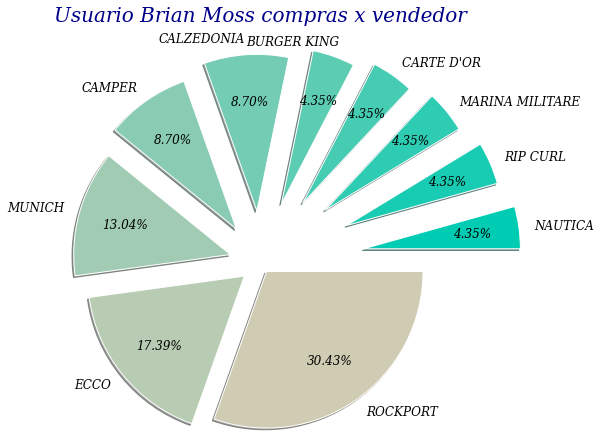

In [18]:
import random
fig, ax = plt.subplots( nrows=1, ncols=1 )
#explode_0 = list(reversed([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22])) 
explode_0 = list(reversed([1,2,3,4,5,6,7,8,9,10])) 

def aleatColors(numberColors): #genera variació de colors amb certa varieta, es pot jugar amb a / b / c
    listColors=[]
    for i in range(0,numberColors):
        listColors.append([0,0,0])
        a,b,c=random.random(),random.random(),random.random()
        listColors[i][0]=((1/numberColors)*i)*0.9
        listColors[i][1]=0.8
        listColors[i][2]=0.7
    return listColors

colors= aleatColors(10)        
explode =list( map(lambda x: x *0.12, explode_0))
ax.figsize=(0,0)
ax.axis('off')
fontdict_1 = {'family': 'serif','color':  'darkblue','weight': 'normal', 'size': 20, 'style':'oblique'}
fontdict_2 = {'family': 'serif','color':  'black','weight': 'normal', 'size': 12, 'style':'oblique'}#Estil dels títols
ax.pie(values,center=(-1,-1),explode = explode,shadow=True, labels = labels,radius=1.8, autopct = '%1.2f%%',colors=colors,textprops =fontdict_2,pctdistance=0.7 )
ax.set_title("Usuario Brian Moss compras x vendedor", y=1.45, pad=35,fontdict=fontdict_1)

In [19]:
df_ticketsBM = df_tickets[df_tickets['bill_to.name'] == 'Brian Moss']
CountVtypeBM = df_ticketsBM['vendor.type'].value_counts()
CountVtypeBM.values >100
CountVtypeBM = CountVtypeBM[CountVtypeBM.values >0]
CountVtypeBM

footwear             16
mixed clothing        3
women's underwear     2
Restaurant            2
Name: vendor.type, dtype: int64

Text(0.7, 1.45, 'User Brian Moss Purchases x sector')

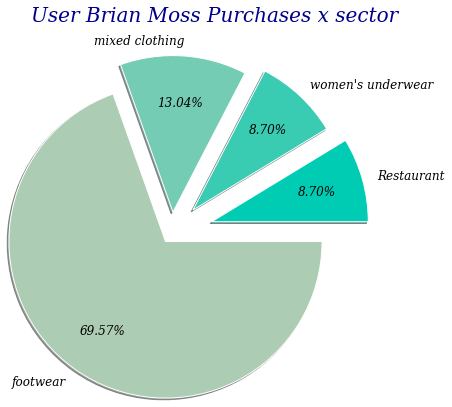

In [31]:
labels=list(CountVtypeBM.index)
values=list(CountVtypeBM.values)
labels = list(reversed(labels))
values = list(reversed(values))

fig, ax = plt.subplots( nrows=1, ncols=1 )
#explode_0 = list(reversed([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22])) 
explode_0 = list(reversed([1,2,3,4])) 

def aleatColors(numberColors): #genera variació de colors amb certa varieta, es pot jugar amb a / b / c
    listColors=[]
    for i in range(0,numberColors):
        listColors.append([0,0,0])
        a,b,c=random.random(),random.random(),random.random()
        listColors[i][0]=((1/numberColors)*i)*0.9
        listColors[i][1]=0.8
        listColors[i][2]=0.7
    return listColors

colors= aleatColors(4)        
explode =list( map(lambda x: x *0.12, explode_0))
ax.figsize=(0,0)
ax.axis('off')
fontdict_1 = {'family': 'serif','color':  'darkblue','weight': 'normal', 'size': 20, 'style':'oblique'}
fontdict_2 = {'family': 'serif','color':  'black','weight': 'normal', 'size': 12, 'style':'oblique'}#Estil dels títols
ax.pie(values,center=(-1,-1),explode = explode,shadow=True, labels = labels,radius=1.8, autopct = '%1.2f%%',colors=colors,textprops =fontdict_2,pctdistance=0.7 )
ax.set_title("User Brian Moss Purchases x sector", x= 0.7, y=1.45, pad=5,fontdict=fontdict_1)